In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *

model_directory = './job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/light_chem/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], k))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149))
metric_names = list(gather_df.columns.values[col_indices])

#get tukey results
tukey_dict = tukey_multi_metrics(gather_df)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
#setup comparison matrix and overlaps
tukey_dict = tukey_multi_metrics(gather_df)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, tukey_analysis_dict, mean_w=0, median_w=1, tukey_w=100)
overlapping_models = get_overlap(agg_comp_dict, N=1)


/home/sliu426/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median for 150 results
  r = func(a, **kwargs)
/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1730: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:780: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


---
## Uninversal Confidence Intervals

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


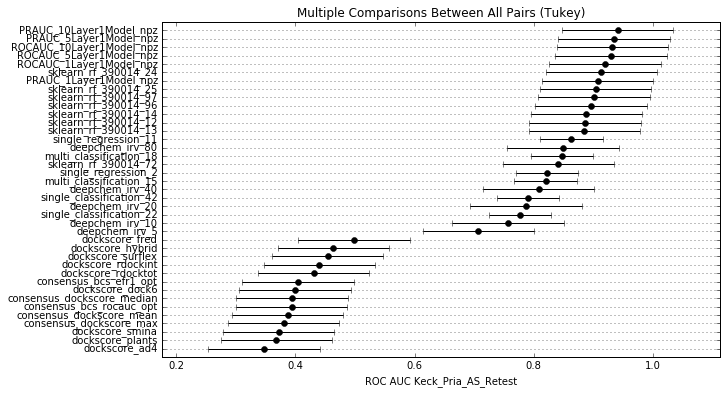

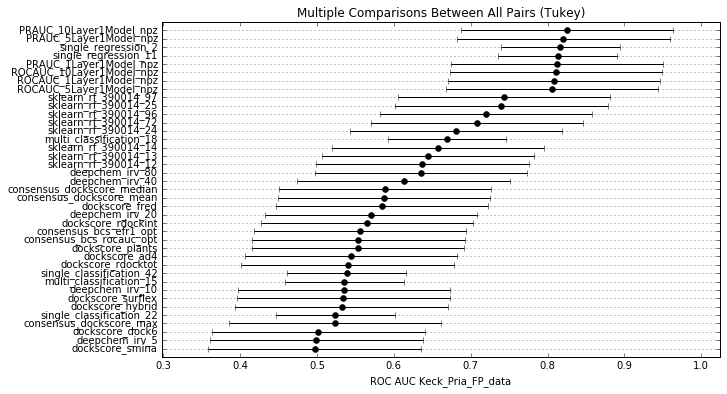

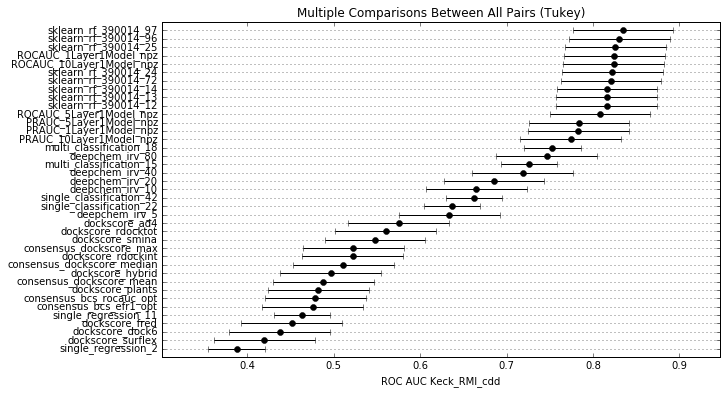

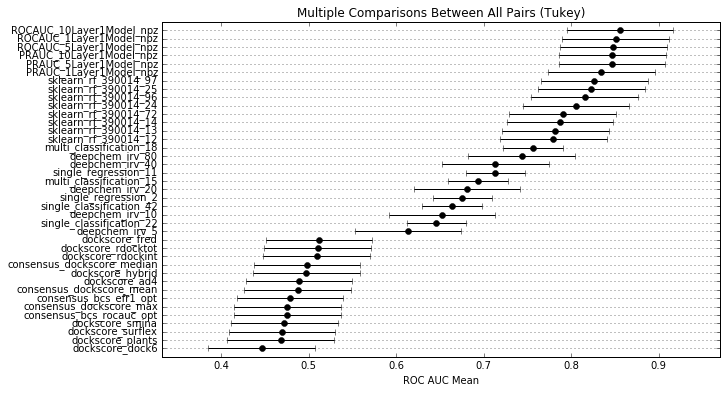

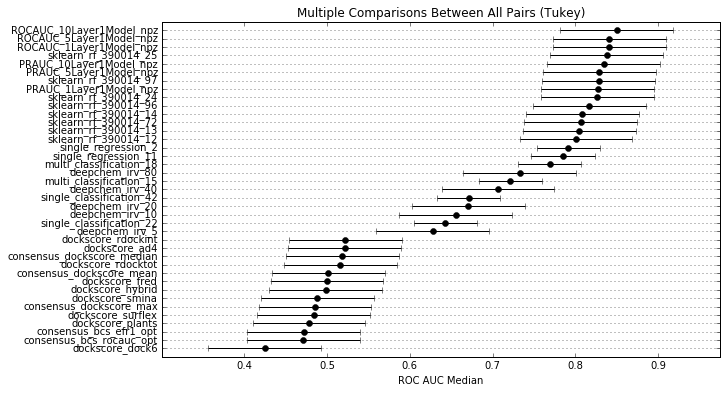

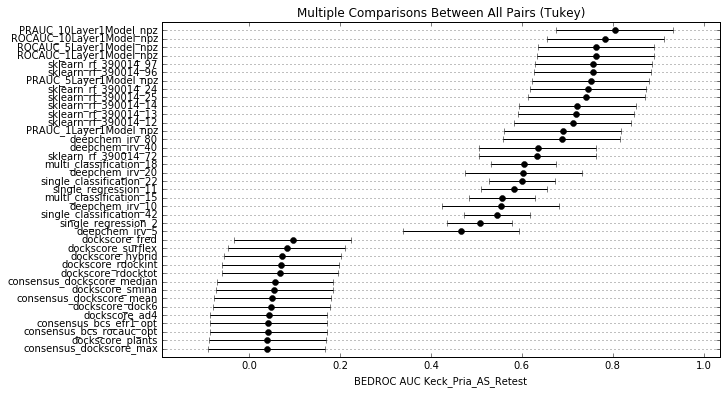

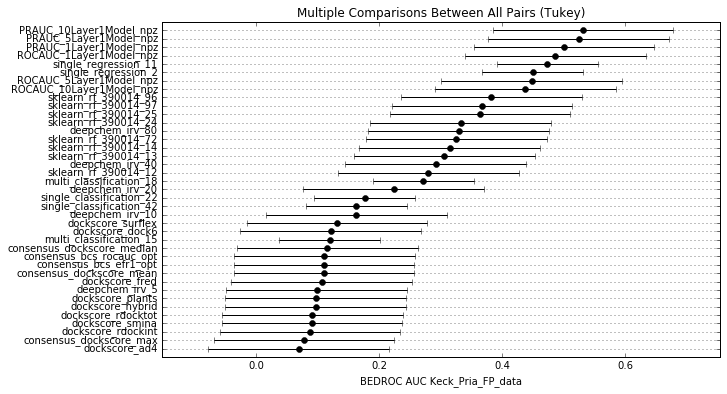

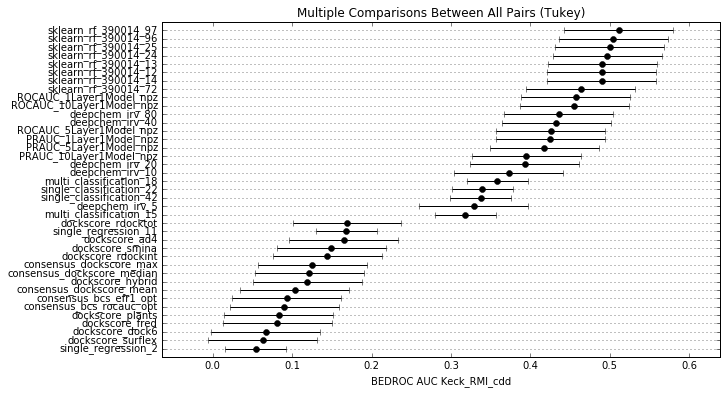

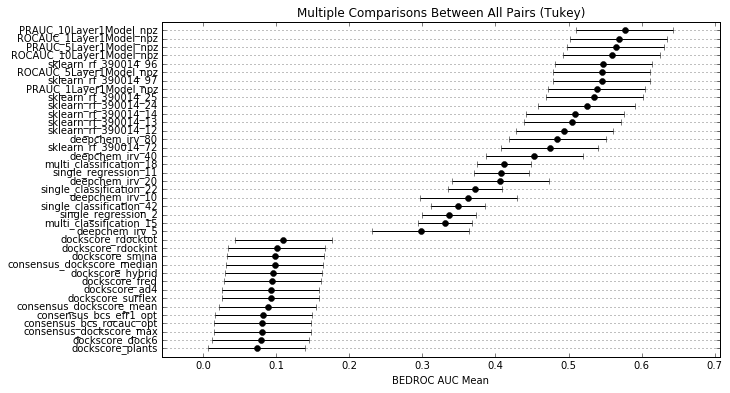

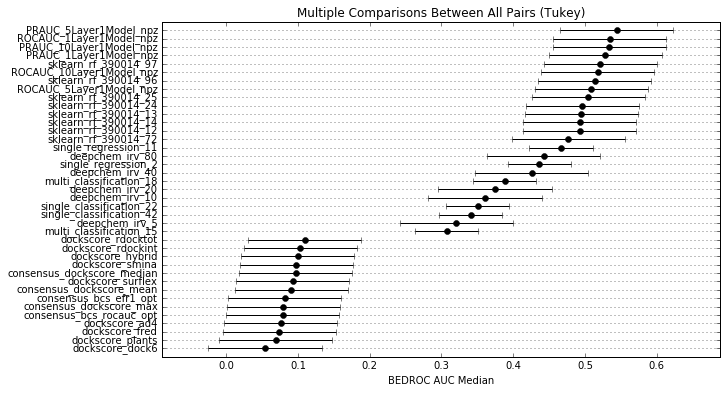

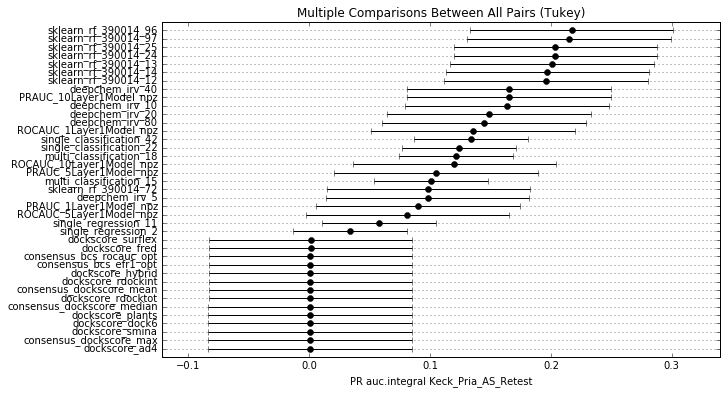

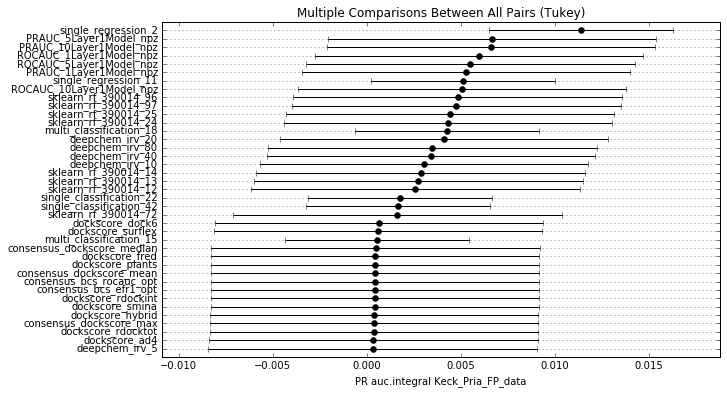

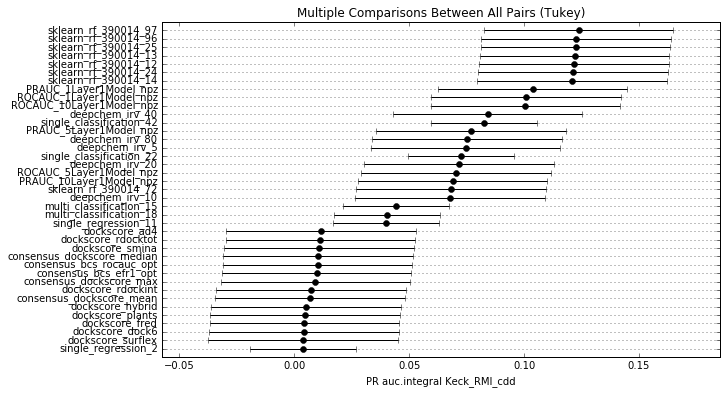

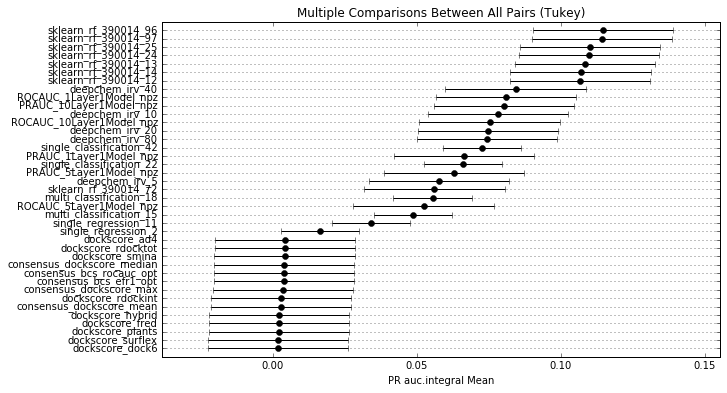

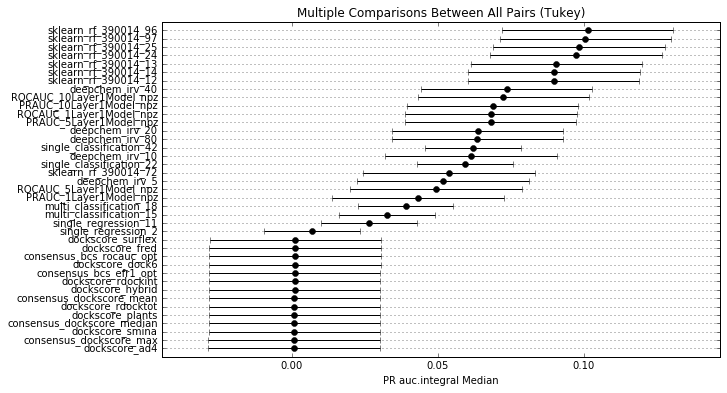

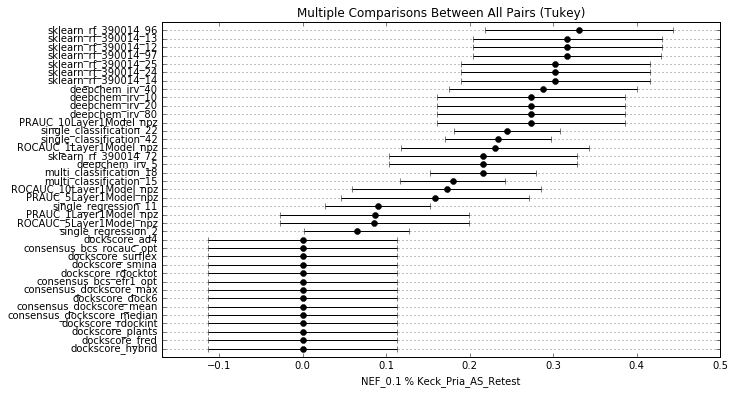

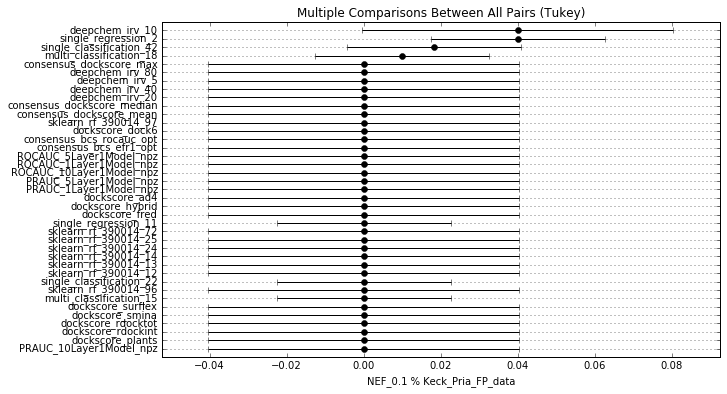

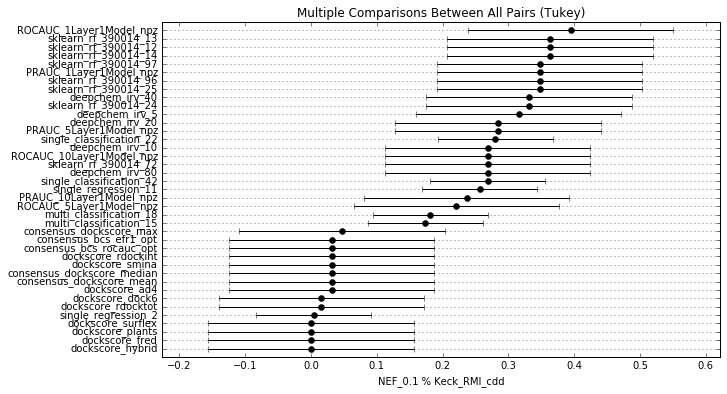

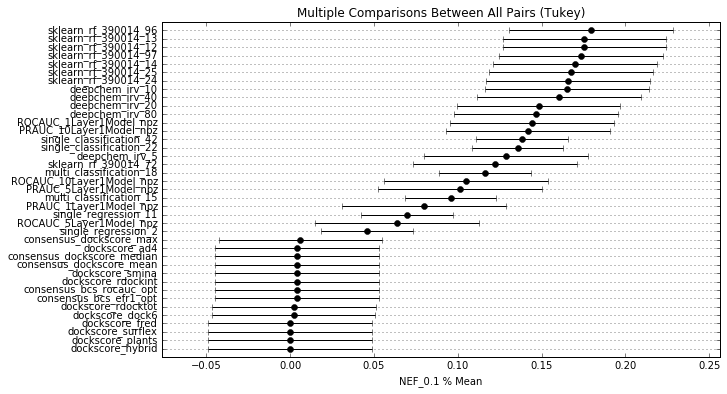

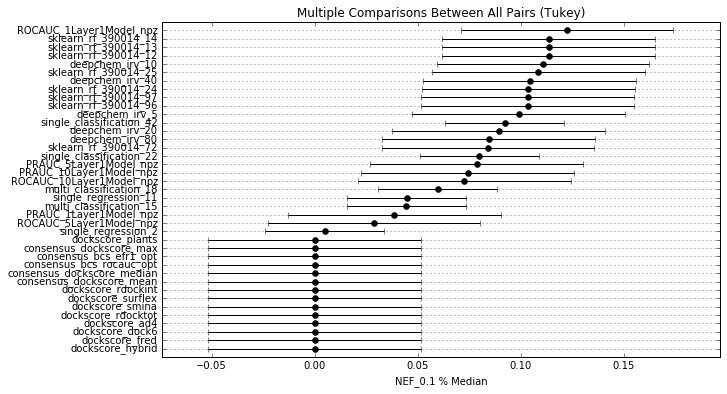

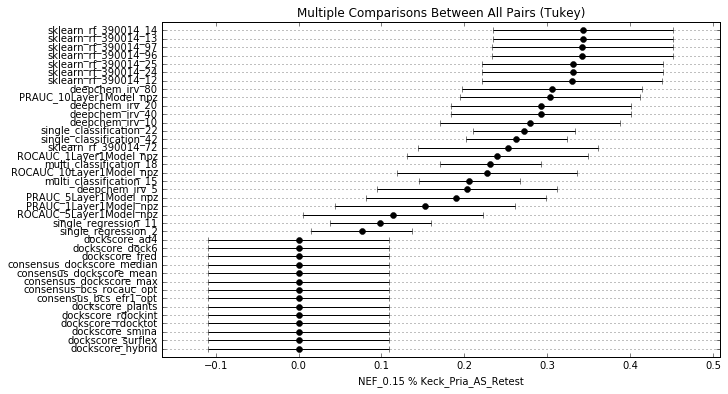

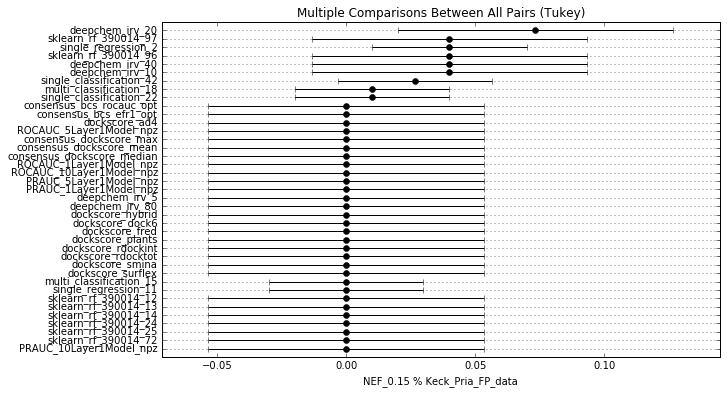

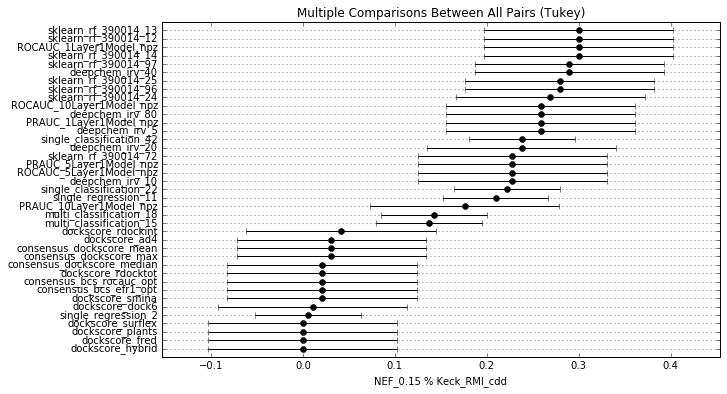

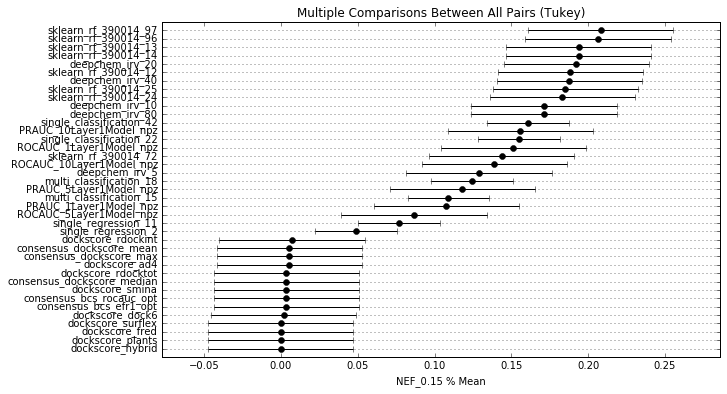

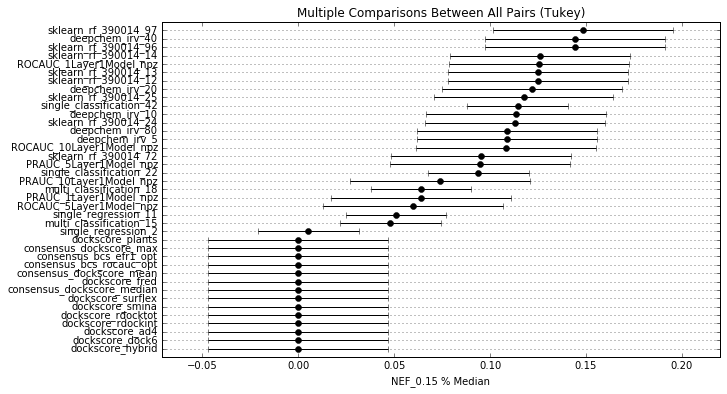

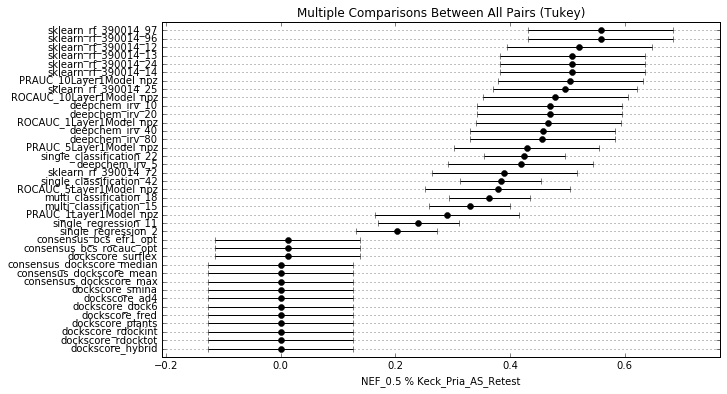

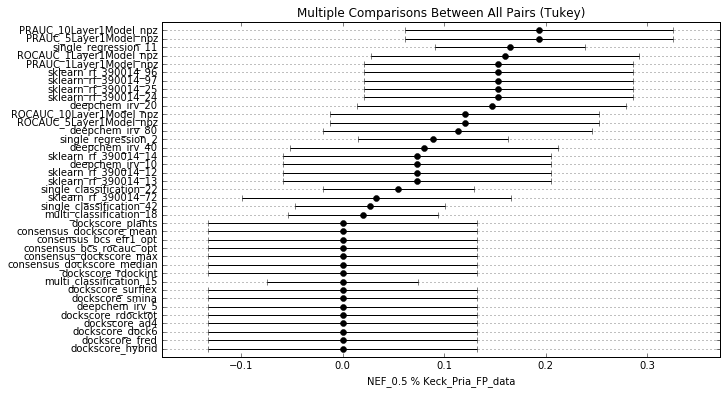

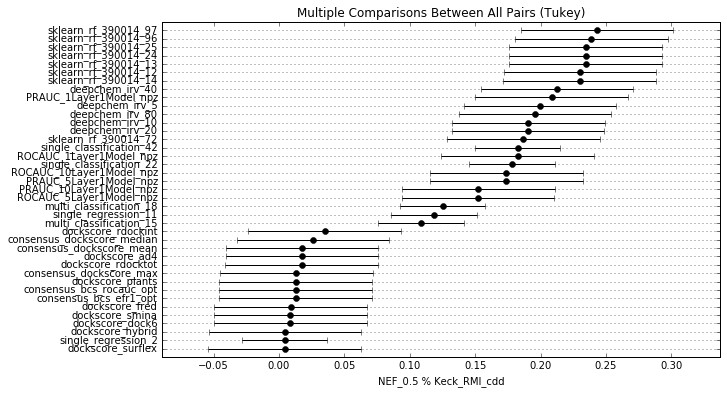

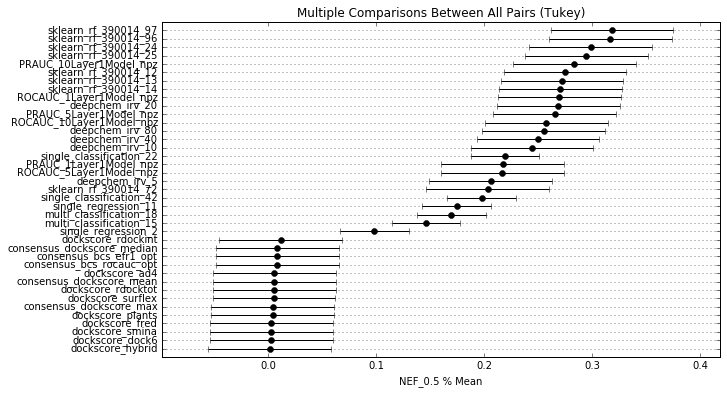

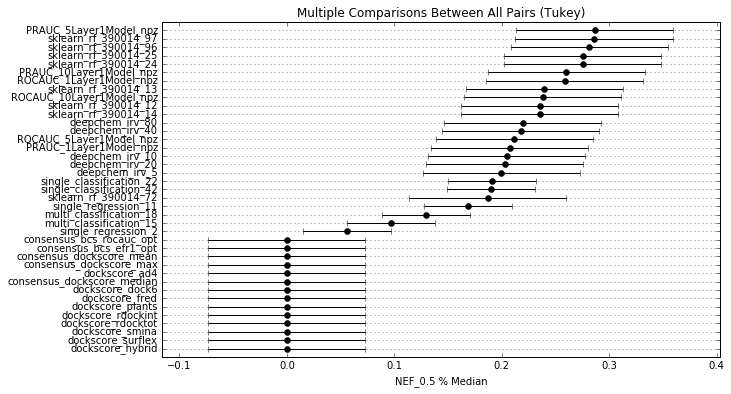

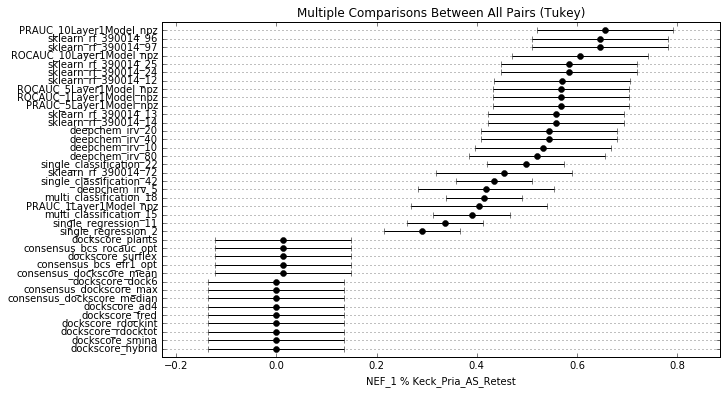

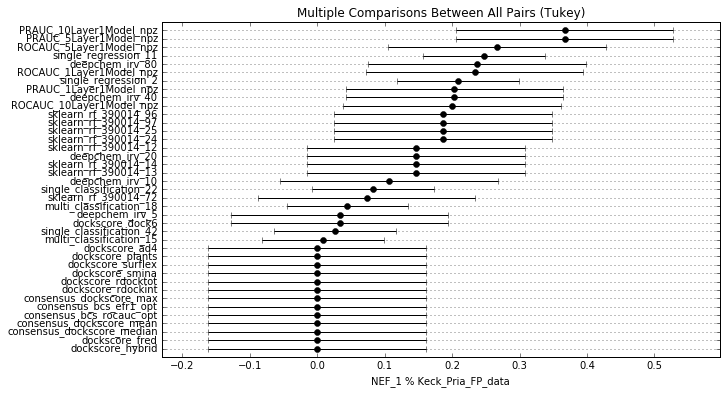

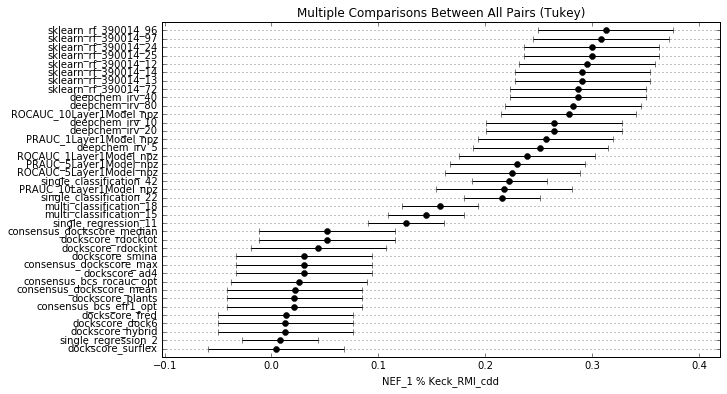

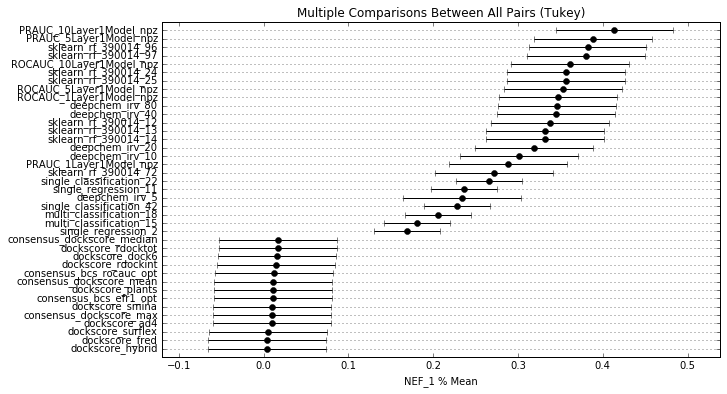

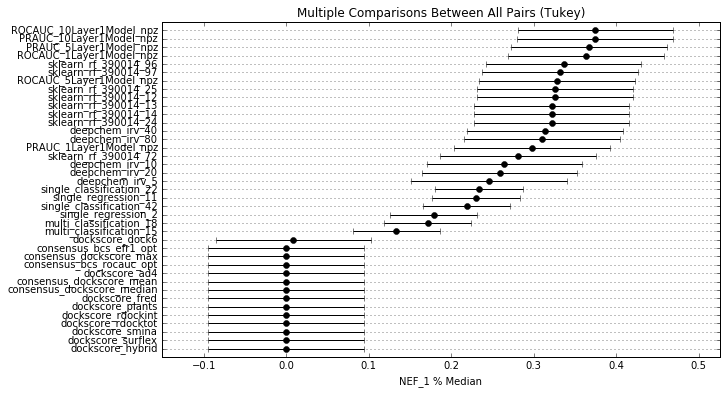

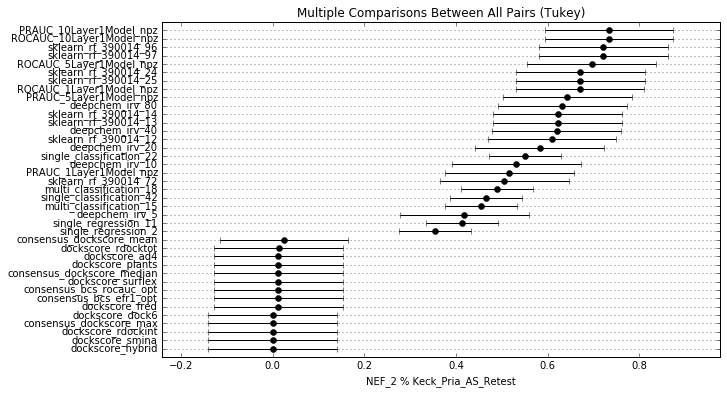

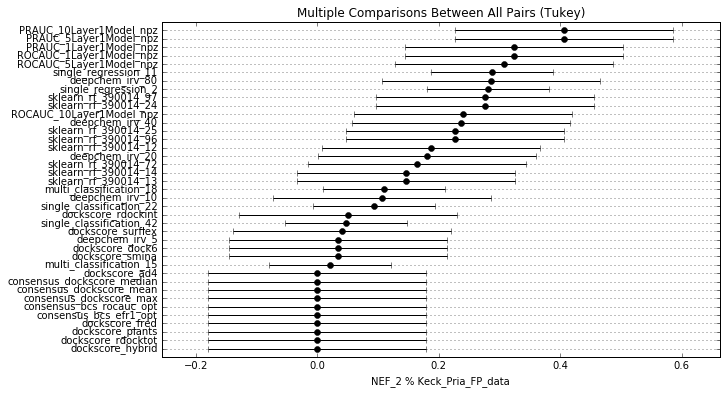

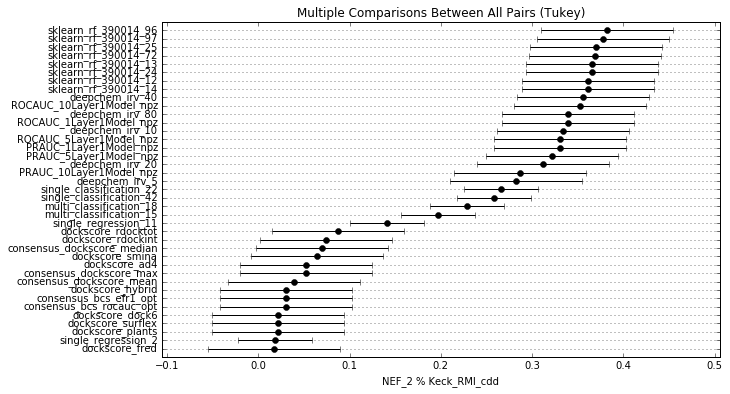

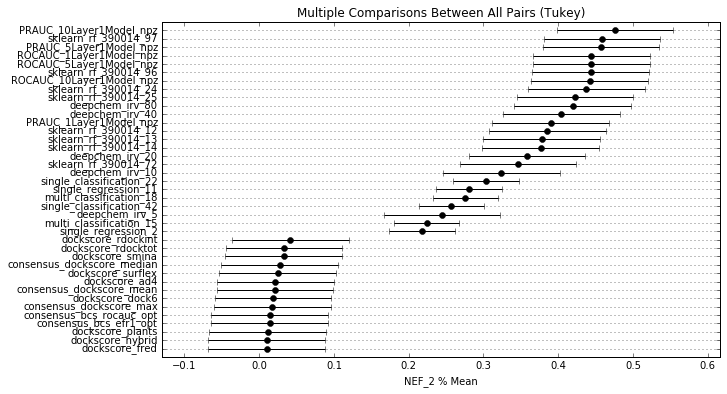

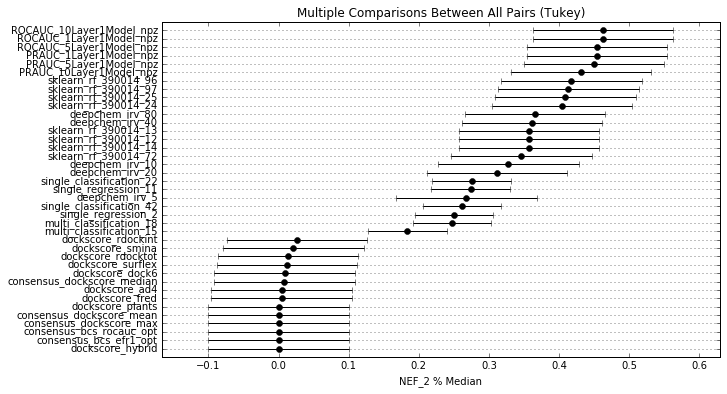

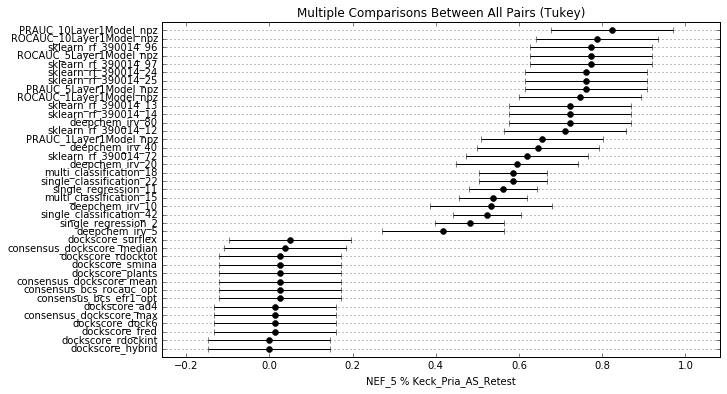

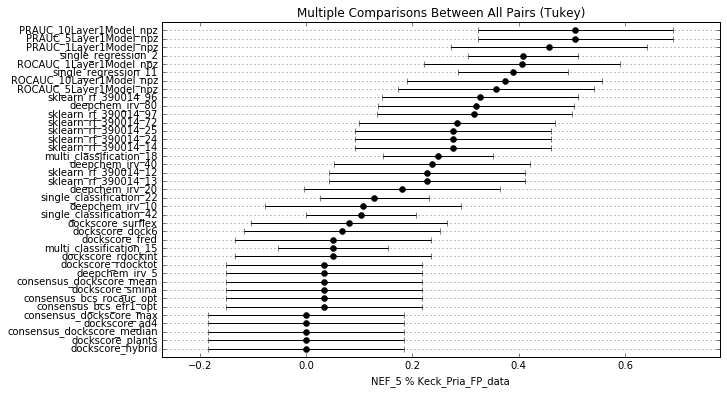

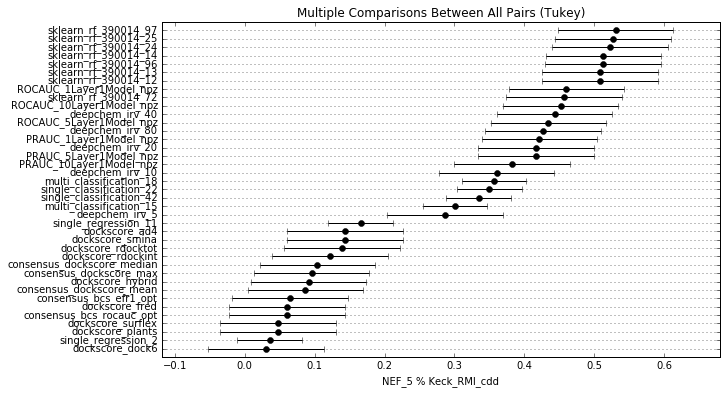

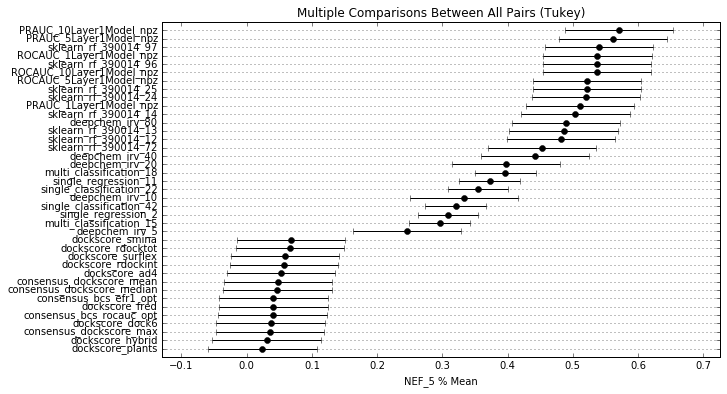

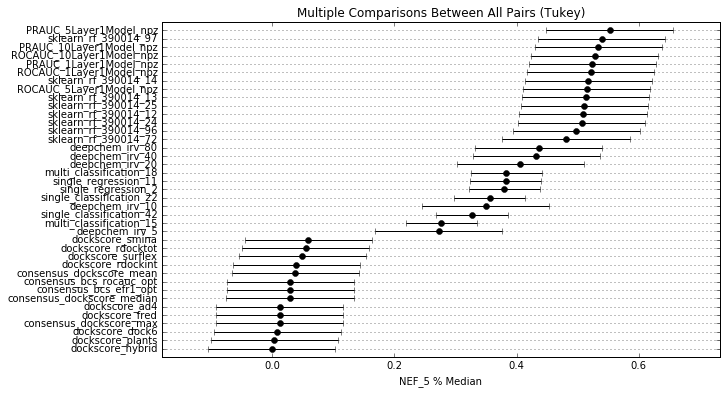

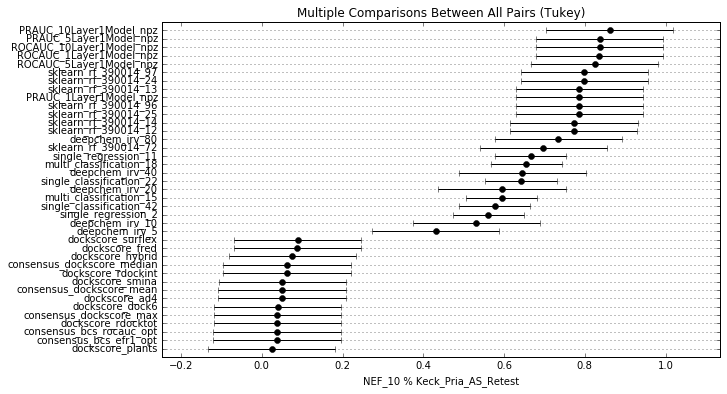

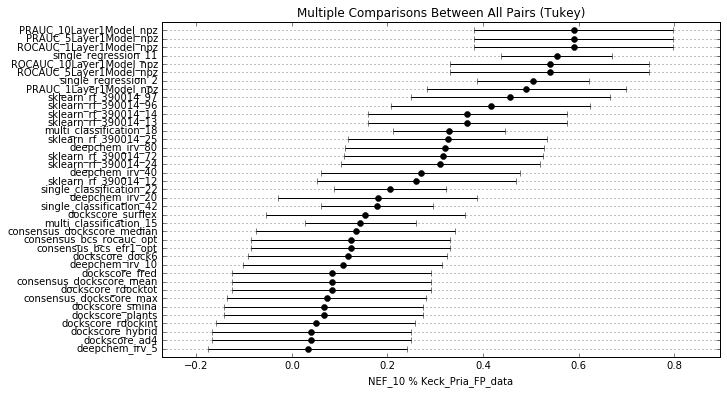

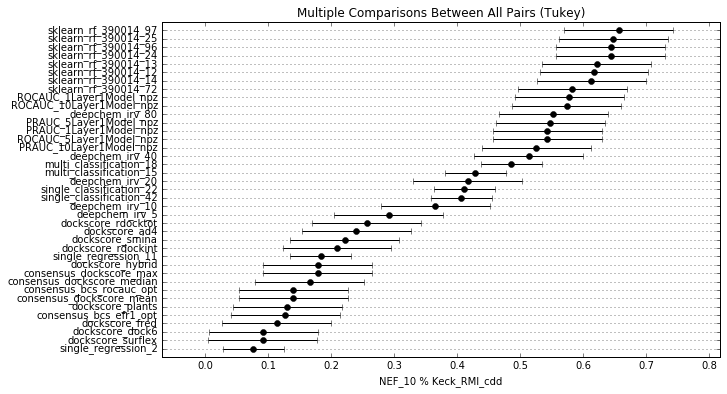

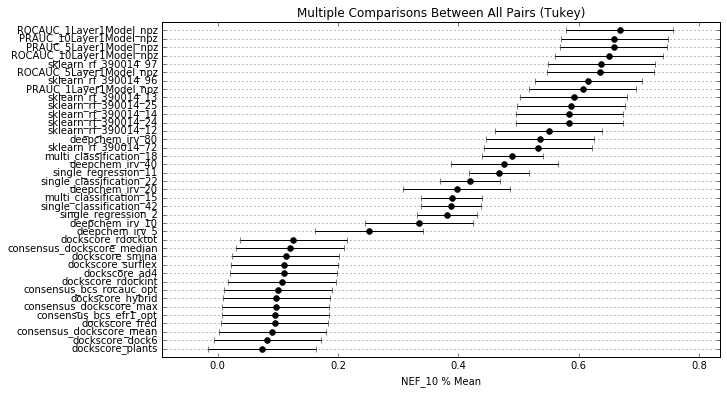

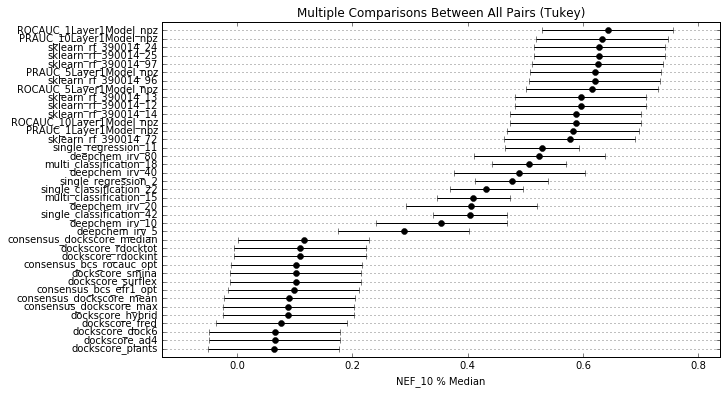

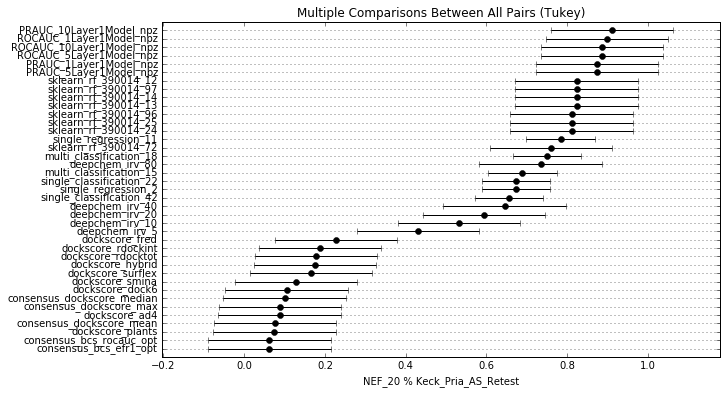

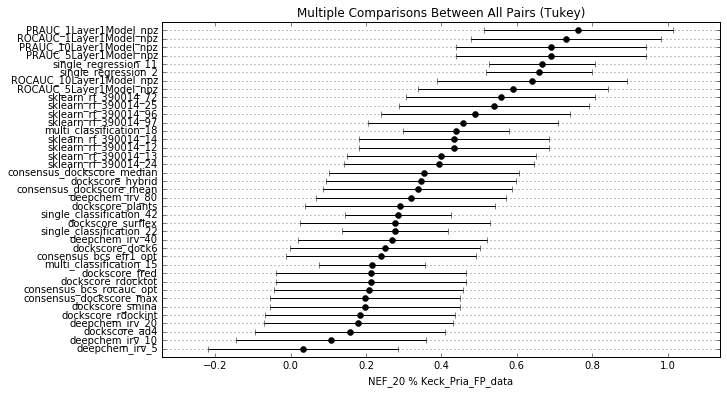

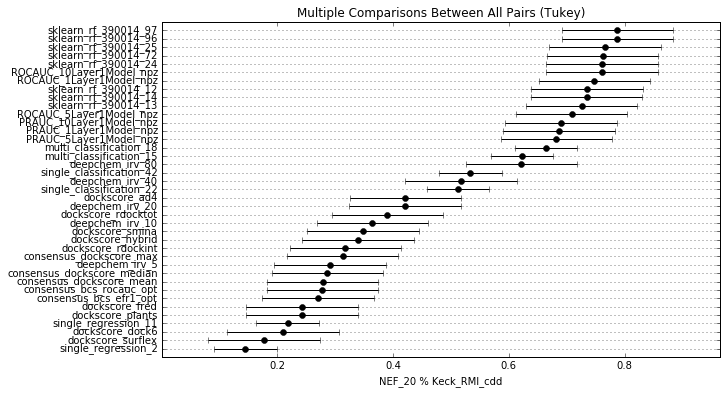

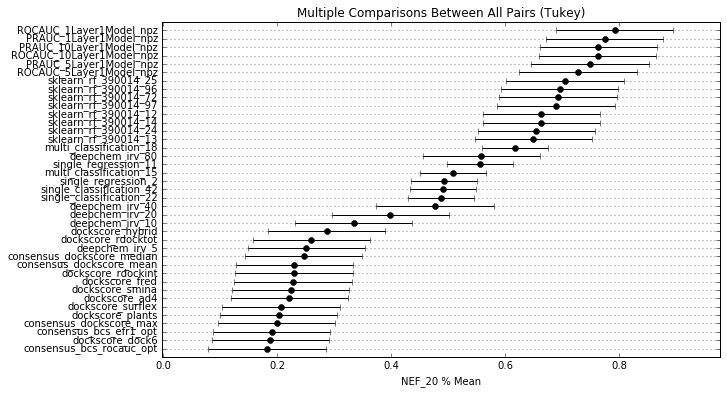

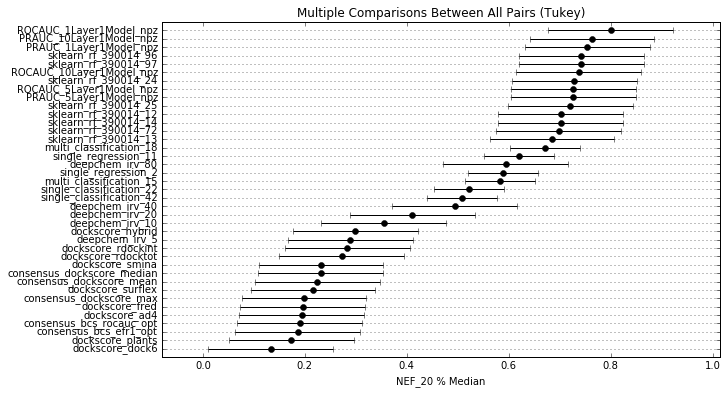

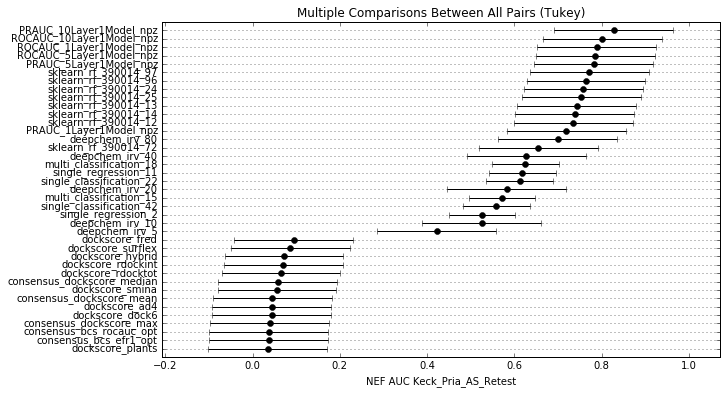

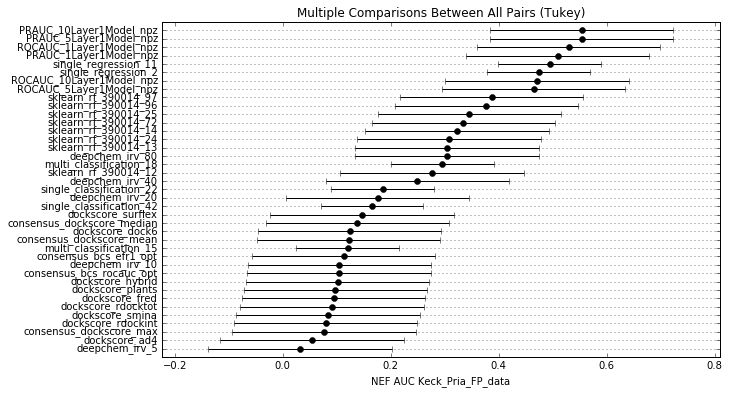

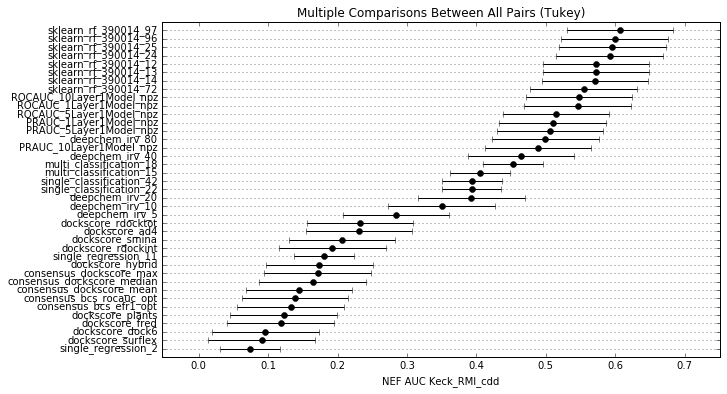

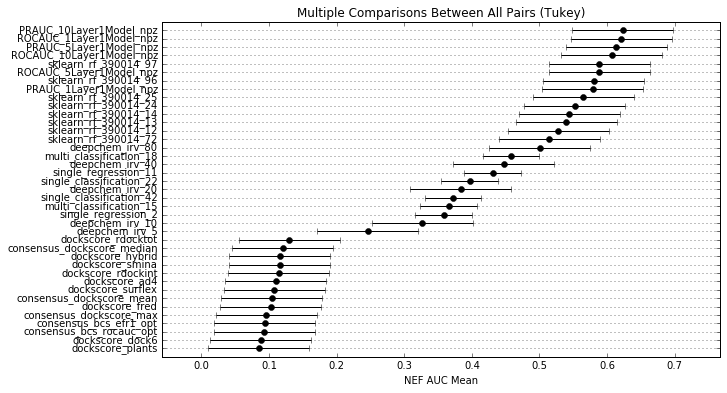

In [3]:
#plot uconf for all metrics
plot_uconf_simple(tukey_dict, metric_names, figsize=(10,6))

####  The confidence intervals are computed for the 'means' at the 0.05 significance using Tukey's Q critical value, so this confidence interval will capture the true-mean 95% of the time. If confidence intervals don't overlap, then we can conclude there is significance.

[1] Hochberg, Y., and A. C. Tamhane. Multiple Comparison Procedures.
           Hoboken, NJ: John Wiley & Sons, 1987.

---
## Model Ordering by Metric (Best-to-Worst)

In [4]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

,ROC AUC Keck_Pria_AS_Retest,ROC AUC Keck_Pria_FP_data,ROC AUC Keck_RMI_cdd,ROC AUC Mean,ROC AUC Median,BEDROC AUC Keck_Pria_AS_Retest,BEDROC AUC Keck_Pria_FP_data,BEDROC AUC Keck_RMI_cdd,BEDROC AUC Mean,BEDROC AUC Median,...,NEF_10 % Median,NEF_20 % Keck_Pria_AS_Retest,NEF_20 % Keck_Pria_FP_data,NEF_20 % Keck_RMI_cdd,NEF_20 % Mean,NEF_20 % Median,NEF AUC Keck_Pria_AS_Retest,NEF AUC Keck_Pria_FP_data,NEF AUC Keck_RMI_cdd,NEF AUC Mean
0,PRAUC_10Layer1Model_npz,single_regression_11,sklearn_rf_390014_97,ROCAUC_10Layer1Model_npz,ROCAUC_10Layer1Model_npz,PRAUC_10Layer1Model_npz,PRAUC_10Layer1Model_npz,sklearn_rf_390014_97,PRAUC_10Layer1Model_npz,PRAUC_10Layer1Model_npz,...,ROCAUC_1Layer1Model_npz,PRAUC_10Layer1Model_npz,single_regression_11,sklearn_rf_390014_97,ROCAUC_1Layer1Model_npz,ROCAUC_1Layer1Model_npz,PRAUC_10Layer1Model_npz,single_regression_2,sklearn_rf_390014_96,ROCAUC_1Layer1Model_npz
1,PRAUC_5Layer1Model_npz,single_regression_2,sklearn_rf_390014_96,ROCAUC_1Layer1Model_npz,sklearn_rf_390014_25,ROCAUC_10Layer1Model_npz,PRAUC_5Layer1Model_npz,sklearn_rf_390014_96,PRAUC_5Layer1Model_npz,PRAUC_5Layer1Model_npz,...,sklearn_rf_390014_96,ROCAUC_1Layer1Model_npz,PRAUC_1Layer1Model_npz,sklearn_rf_390014_96,PRAUC_1Layer1Model_npz,sklearn_rf_390014_97,ROCAUC_10Layer1Model_npz,single_regression_11,sklearn_rf_390014_97,PRAUC_10Layer1Model_npz
2,ROCAUC_5Layer1Model_npz,PRAUC_10Layer1Model_npz,sklearn_rf_390014_72,PRAUC_10Layer1Model_npz,ROCAUC_5Layer1Model_npz,ROCAUC_5Layer1Model_npz,single_regression_11,sklearn_rf_390014_25,ROCAUC_1Layer1Model_npz,ROCAUC_1Layer1Model_npz,...,sklearn_rf_390014_25,PRAUC_1Layer1Model_npz,single_regression_2,sklearn_rf_390014_72,ROCAUC_10Layer1Model_npz,sklearn_rf_390014_96,ROCAUC_1Layer1Model_npz,PRAUC_10Layer1Model_npz,sklearn_rf_390014_24,ROCAUC_10Layer1Model_npz
3,ROCAUC_10Layer1Model_npz,PRAUC_5Layer1Model_npz,ROCAUC_1Layer1Model_npz,PRAUC_5Layer1Model_npz,ROCAUC_1Layer1Model_npz,ROCAUC_1Layer1Model_npz,single_regression_2,sklearn_rf_390014_24,ROCAUC_5Layer1Model_npz,PRAUC_1Layer1Model_npz,...,sklearn_rf_390014_24,ROCAUC_10Layer1Model_npz,ROCAUC_1Layer1Model_npz,ROCAUC_10Layer1Model_npz,PRAUC_10Layer1Model_npz,PRAUC_1Layer1Model_npz,ROCAUC_5Layer1Model_npz,PRAUC_5Layer1Model_npz,sklearn_rf_390014_25,PRAUC_5Layer1Model_npz
4,sklearn_rf_390014_24,ROCAUC_10Layer1Model_npz,sklearn_rf_390014_24,ROCAUC_5Layer1Model_npz,PRAUC_10Layer1Model_npz,sklearn_rf_390014_97,ROCAUC_1Layer1Model_npz,sklearn_rf_390014_14,ROCAUC_10Layer1Model_npz,sklearn_rf_390014_97,...,sklearn_rf_390014_97,PRAUC_5Layer1Model_npz,PRAUC_10Layer1Model_npz,ROCAUC_1Layer1Model_npz,PRAUC_5Layer1Model_npz,PRAUC_10Layer1Model_npz,PRAUC_5Layer1Model_npz,ROCAUC_1Layer1Model_npz,sklearn_rf_390014_72,ROCAUC_5Layer1Model_npz
5,sklearn_rf_390014_25,PRAUC_1Layer1Model_npz,sklearn_rf_390014_25,sklearn_rf_390014_25,single_regression_2,sklearn_rf_390014_96,PRAUC_1Layer1Model_npz,sklearn_rf_390014_13,sklearn_rf_390014_97,ROCAUC_10Layer1Model_npz,...,PRAUC_5Layer1Model_npz,ROCAUC_5Layer1Model_npz,PRAUC_5Layer1Model_npz,sklearn_rf_390014_25,ROCAUC_5Layer1Model_npz,ROCAUC_5Layer1Model_npz,sklearn_rf_390014_96,PRAUC_1Layer1Model_npz,sklearn_rf_390014_12,sklearn_rf_390014_97
6,sklearn_rf_390014_96,ROCAUC_1Layer1Model_npz,ROCAUC_10Layer1Model_npz,PRAUC_1Layer1Model_npz,sklearn_rf_390014_97,PRAUC_5Layer1Model_npz,ROCAUC_5Layer1Model_npz,sklearn_rf_390014_12,sklearn_rf_390014_96,sklearn_rf_390014_96,...,ROCAUC_5Layer1Model_npz,single_regression_11,ROCAUC_10Layer1Model_npz,sklearn_rf_390014_24,sklearn_rf_390014_72,sklearn_rf_390014_24,sklearn_rf_390014_97,ROCAUC_5Layer1Model_npz,ROCAUC_10Layer1Model_npz,PRAUC_1Layer1Model_npz
7,ROCAUC_1Layer1Model_npz,ROCAUC_5Layer1Model_npz,sklearn_rf_390014_14,sklearn_rf_390014_97,sklearn_rf_390014_72,sklearn_rf_390014_25,ROCAUC_10Layer1Model_npz,sklearn_rf_390014_72,sklearn_rf_390014_24,sklearn_rf_390014_13,...,PRAUC_10Layer1Model_npz,sklearn_rf_390014_96,sklearn_rf_390014_72,sklearn_rf_390014_14,sklearn_rf_390014_25,ROCAUC_1

Overall, top 5 models 

---
## Overlapping top 1 models over all metrics

In [5]:
overlapping_models

,overlap_perc
PRAUC_10Layer1Model_npz,0.250000
sklearn_rf_390014_97,0.250000
sklearn_rf_390014_96,0.133333
ROCAUC_1Layer1Model_npz,0.133333
single_regression_11,0.066667
ROCAUC_10Layer1Model_npz,0.050000
sklearn_rf_390014_13,0.033333
single_regression_2,0.033333
deepchem_irv_40,0.016667
PRAUC_5Layer1Model_npz,0.016667


In [6]:
get_overlap(agg_comp_dict, N=5)

,overlap_perc
sklearn_rf_390014_97,0.633333
sklearn_rf_390014_96,0.466667
PRAUC_10Layer1Model_npz,0.466667
PRAUC_5Layer1Model_npz,0.450000
ROCAUC_1Layer1Model_npz,0.400000
ROCAUC_10Layer1Model_npz,0.333333
sklearn_rf_390014_25,0.316667
sklearn_rf_390014_24,0.300000
ROCAUC_5Layer1Model_npz,0.283333
sklearn_rf_390014_12,0.183333
